In [1]:
import numpy as np
# Open the file in read-only mo
filename = 'rho_hist.txt'
rho = np.loadtxt(filename)

filename = 'exx_hist.txt'
energy = np.loadtxt(filename)

In [2]:
print(rho[:,0])

[ 0.03147412  0.13420282  0.30656055  0.54364726  0.83904272  1.1848766
  1.5720728   1.9906667   2.4301619   2.8799147   3.3295334   3.7692832
  4.190485    4.5858983   4.9500785   5.2797005   5.5738429   5.8342268
  6.0654083   6.274923    6.4733857   6.6745489   6.8953201   7.1556998
  7.4784001   7.887182    8.4013004   9.0219974   9.7111952  10.378501
 10.906995   11.220289   11.327431   11.284303   11.113438   10.781103
 10.258211    9.5875084   8.8756373   8.2288507   7.7069472   7.3223579
  7.0604108   6.8967146   6.8057999   6.7641813   6.7512263   6.7494032
  6.7443836   6.7250945   6.6837289   6.6157078   6.5195888   6.3969169
  6.2520185   6.0917394   5.9251317   5.7630968   5.6179918   5.5032107
  5.4327508   5.420777    5.4811953   5.6272486   5.8711362   6.2236136
  6.6932901   7.2845104   7.9908497   8.7799629   9.5716343  10.230453
 10.607353   10.623781   10.321614    9.822257    9.2446027   8.6599879
  8.095885    7.5565262   7.0380767   6.5353063   6.0436664   5.559

In [3]:
print(rho.shape)

(100, 20)


In [4]:
print(energy.shape)

(20,)


In [5]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from decimal import Decimal

data_loader = torch.utils.data.DataLoader(rho, batch_size = 1, shuffle=True)
for data in data_loader:
    print( data)
    
data_loader = torch.utils.data.DataLoader(energy, batch_size = 1, shuffle=True)
for data in data_loader:
    print( data)

RhoTensor = torch.tensor(rho, dtype=torch.float32)
RhoTran = torch.transpose(RhoTensor, 0, 1)
EnergyTensor = torch.tensor(energy, dtype=torch.float32)


# print(data[0][0].numpy())

# plt.figure()
# plt.plot(data.t().numpy())
    

tensor([[11.3274,  5.7035,  5.7308,  5.5094,  3.4068,  6.6811,  6.1164,  6.1276,
          6.0753, 10.9977,  3.5577,  7.1083,  5.6384,  4.4844,  6.5574,  9.8417,
          4.6311,  6.2430,  6.8108,  5.9831]], dtype=torch.float64)
tensor([[ 9.0220,  7.1206,  7.2483,  6.7153,  4.8091, 13.7441,  7.1996,  6.9985,
          6.4954,  8.7187,  5.7353,  6.9748,  7.0261,  6.7879,  6.7399,  8.4715,
          7.0386,  7.0426,  6.6609,  7.1360]], dtype=torch.float64)
tensor([[ 3.2248,  3.2935,  3.6604,  2.9054,  4.0044,  3.9383,  4.6989,  8.4632,
          2.7703,  3.5296,  4.2428,  4.5881, 12.2610,  3.8054,  9.6989,  5.8730,
          4.3238,  8.4461,  3.8525,  8.9784]], dtype=torch.float64)
tensor([[ 7.0381,  7.9190,  7.1774,  7.9390,  7.3743,  9.4000,  7.7298,  9.4334,
          7.4697,  6.0973,  7.6714,  7.7661,  6.4034,  6.7345,  8.2711,  8.4992,
          7.1026, 10.5312,  6.9962,  7.8977]], dtype=torch.float64)
tensor([[8.7800, 7.3083, 8.9740, 6.9294, 6.4509, 6.4244, 7.9644, 7.8044, 7.3188,

In [6]:
#neural network model
class RhoModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RhoModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) #connected layers similar to matrix multiplication
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.act3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(hidden_size, hidden_size)
        self.act4 = nn.LeakyReLU()
        self.fc5 = nn.Linear(hidden_size, output_size)
        
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        x = self.act4(x)
        x = self.fc5(x)
        return x
    
# Define the hyperparameters
input_size = 100  # Input size of the data
hidden_size = 20  # Size of the hidden layer
#hidden size is the number of features in the hidden state h. Number of nodes in a layer (vector length)
output_size = 1  # Output size of the model
learning_rate = 0.001  # Learning rate for optimization
n_epochs = 2500  # Number of epochs for training

        
myModel = RhoModel(input_size, hidden_size, output_size)
#Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input  x and target  y.
criterion = nn.MSELoss() #loss function
#Implements Adam algorithm.
optimizer = optim.Adam(myModel.parameters(), lr=learning_rate)

#training
for epoch in range(n_epochs):
    outputs_pred = myModel(RhoTran)
    loss = criterion(outputs_pred, EnergyTensor)
    
    for param in myModel.parameters():
        param.grad = None
    loss.backward()
    optimizer.step()
    
     # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{n_epochs}], Loss: {loss.item():.2E}')




C:\Users\Jeremiah\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/2500], Loss: 5.44E+00
Epoch [20/2500], Loss: 2.76E-02
Epoch [30/2500], Loss: 2.28E-01
Epoch [40/2500], Loss: 1.69E-01
Epoch [50/2500], Loss: 4.79E-03
Epoch [60/2500], Loss: 8.34E-03
Epoch [70/2500], Loss: 9.53E-03
Epoch [80/2500], Loss: 3.37E-03
Epoch [90/2500], Loss: 1.21E-03
Epoch [100/2500], Loss: 9.47E-04
Epoch [110/2500], Loss: 8.96E-04
Epoch [120/2500], Loss: 8.06E-04
Epoch [130/2500], Loss: 7.17E-04
Epoch [140/2500], Loss: 6.51E-04
Epoch [150/2500], Loss: 6.01E-04
Epoch [160/2500], Loss: 5.60E-04
Epoch [170/2500], Loss: 5.26E-04
Epoch [180/2500], Loss: 5.02E-04
Epoch [190/2500], Loss: 4.83E-04
Epoch [200/2500], Loss: 4.66E-04
Epoch [210/2500], Loss: 4.51E-04
Epoch [220/2500], Loss: 4.39E-04
Epoch [230/2500], Loss: 4.27E-04
Epoch [240/2500], Loss: 4.17E-04
Epoch [250/2500], Loss: 4.08E-04
Epoch [260/2500], Loss: 4.00E-04
Epoch [270/2500], Loss: 3.92E-04
Epoch [280/2500], Loss: 3.85E-04
Epoch [290/2500], Loss: 3.78E-04
Epoch [300/2500], Loss: 3.72E-04
Epoch [310/2500], L

Epoch [2490/2500], Loss: 7.03E-05
Epoch [2500/2500], Loss: 6.99E-05


<function matplotlib.pyplot.show(close=None, block=None)>

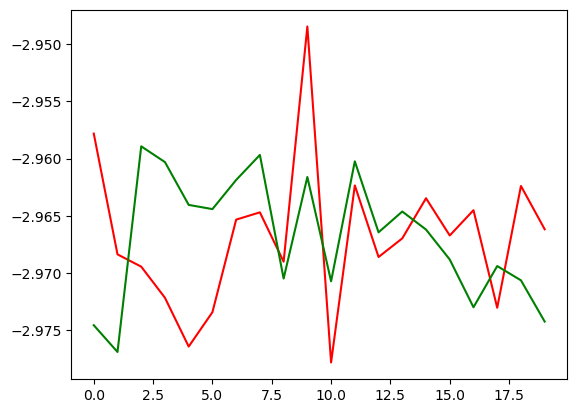

In [7]:
output = EnergyTensor.detach().numpy()
predicted_output = outputs_pred.detach().numpy()
plt.plot(output, color = 'red')
plt.plot(predicted_output, color = 'green')
plt.show

In [8]:
print(RhoTran)
print(output)
print(predicted_output)

tensor([[0.0315, 0.1342, 0.3066,  ..., 0.2313, 0.1008, 0.0236],
        [0.0337, 0.1441, 0.3300,  ..., 0.2198, 0.0956, 0.0223],
        [0.0362, 0.1545, 0.3537,  ..., 0.3672, 0.1648, 0.0391],
        ...,
        [0.0226, 0.0967, 0.2219,  ..., 0.5653, 0.2457, 0.0574],
        [0.0404, 0.1722, 0.3937,  ..., 0.2888, 0.1260, 0.0295],
        [0.0279, 0.1193, 0.2736,  ..., 0.6659, 0.2893, 0.0675]])
[-2.9578202 -2.9683666 -2.9694402 -2.9721596 -2.9764163 -2.9734156
 -2.9653323 -2.9646976 -2.9690065 -2.9484656 -2.9778075 -2.9623473
 -2.9685967 -2.9669702 -2.9634657 -2.966719  -2.9645097 -2.9730291
 -2.962394  -2.966174 ]
[[-2.9745533]
 [-2.9768898]
 [-2.9589322]
 [-2.9603097]
 [-2.9640462]
 [-2.9644141]
 [-2.9618685]
 [-2.9596832]
 [-2.9704764]
 [-2.961611 ]
 [-2.9707177]
 [-2.960244 ]
 [-2.9664419]
 [-2.9646246]
 [-2.9662006]
 [-2.9688177]
 [-2.9729843]
 [-2.9693882]
 [-2.970633 ]
 [-2.9742355]]


In [9]:
print(energy)

[-2.9578201 -2.9683666 -2.9694402 -2.9721596 -2.9764164 -2.9734155
 -2.9653322 -2.9646975 -2.9690066 -2.9484655 -2.9778076 -2.9623472
 -2.9685966 -2.9669702 -2.9634658 -2.9667188 -2.9645098 -2.9730291
 -2.962394  -2.9661739]
